In [4]:
function lotka_volterra(du,u,p,t)
  x,y = u
  a, b, c, d = p
  du[1] = dx = a*x - b*x*y
  du[2] = dy = -c*y + d*x*y
end
u0 = [1.0,1.0]
tspan = (0.0,10.0)
p = [1.5 1.0 3.0 1.0]

1×4 Array{Float64,2}:
 1.5  1.0  3.0  1.0

In [5]:
using DifferentialEquations
prob = ODEProblem(lotka_volterra,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

In [6]:
sol = solve(prob,Tsit5(),saveat=0.1)
A = sol[1,:]

101-element Array{Float64,1}:
 1.0               
 1.0610780673356452
 1.1440276717257598
 1.249171212572448 
 1.3776445705636389
 1.5312308177480445
 1.7122697558185596
 1.9235782758302444
 2.16839108970141  
 2.450250667139228 
 2.772822302591004 
 3.139732989468245 
 3.553901355469539 
 ⋮                 
 4.346171264966188 
 3.2465863221342475
 2.3956662167528835
 1.8172822873986525
 1.4427612797125071
 1.2089080986913698
 1.068592596227856 
 0.9910229662215917
 0.9574213545848071
 0.9569793998644444
 0.9835609175876878
 1.03375813933372  

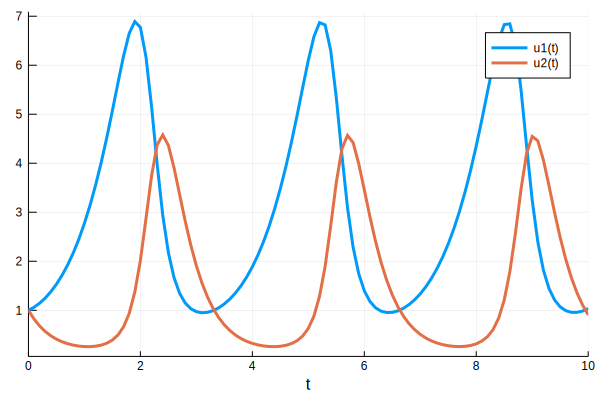

In [18]:
using Plots
plot(sol)

In [19]:
savefig("lotka-volterra_rabits-vs-wolves.png")


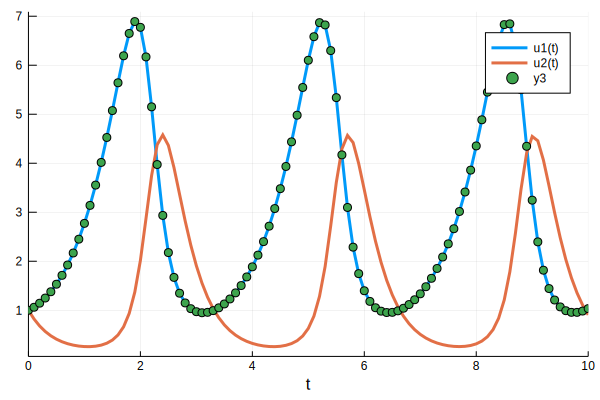

In [8]:
t = 0:0.1:10.0
scatter!(t,A)

In [9]:
using Flux, DiffEqFlux
diffeq_rd(p,prob,Tsit5(),saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 101-element Array{Float64,1}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮  
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0
u: 101-element Array{Array{Float64,1},1}:
 [1.0, 1.0]                               
 [1.0610780673356452, 0.821084277588617]  
 [1.1440276717257598, 0.67905266897845]   
 [1.249171212572448, 0.5668931465841182]  
 [1.3776445705636389, 0.47881295137951496]
 [1.5312308177480445, 0.41015646708587966]
 [1.7122697558185596, 0.35726544879731786]
 [1.9235782758302444, 0.3173472061624414] 
 [2.16839108970141, 0.28838884378747914]  
 [2.450250667139228, 0.26905370939591144] 
 [2.772822302591004, 0.25872441605775215] 
 [3.139732989468245, 0.2574966932112513]  
 [3.553901355469539, 0.2664500559112617]  
 ⋮                                        
 [4.346171264966188, 4.2046980556606455]  
 [3.2465863221342475, 4.546928360047927]  
 [2.3956662167528835, 4.45776555

In [10]:
p = param([2.2, 1.0, 2.0, 0.4]) # Initial Parameter Vector
params = Flux.Params([p])

Params([[2.2, 1.0, 2.0, 0.4] (tracked)])

In [11]:
function predict_rd() # Our 1-layer neural network
  diffeq_rd(p,prob,Tsit5(),saveat=0.1)[1,:]
end

predict_rd (generic function with 1 method)

In [12]:
# loss_rd() = sum(abs2,x-1 for x in predict_rd()) # loss function
loss_rd() = sum(abs2,(x=predict_rd(); x[i]-1 for i in 1:size(x)[1])) # loss function

loss_rd (generic function with 1 method)

In [13]:
data = Iterators.repeated((), 100)
opt = ADAM(0.1)
cb = function () #callback function to observe training
  display(loss_rd())
  # using `remake` to re-create our `prob` with current parameters `p`
  display(plot(solve(remake(prob,p=Flux.data(p)),Tsit5(),saveat=0.1),ylim=(0,6),vars=(1,2)))
end

#17 (generic function with 1 method)

4321.843681747284 (tracked)

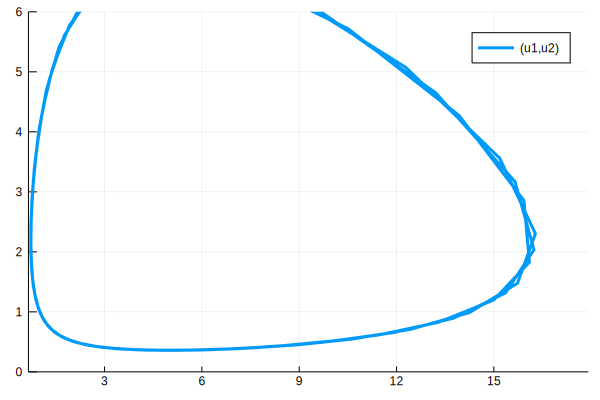

In [14]:
# Display the ODE with the initial parameter values.
cb()

1973.163353314727 (tracked)

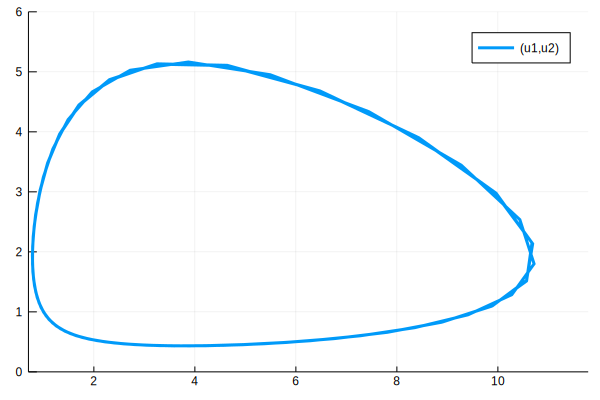

1017.7357681240346 (tracked)

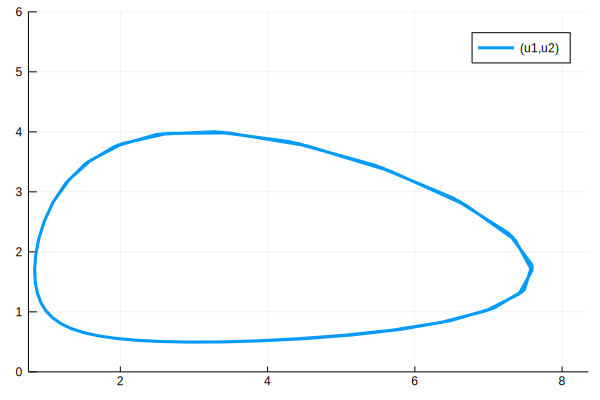

566.499431862155 (tracked)

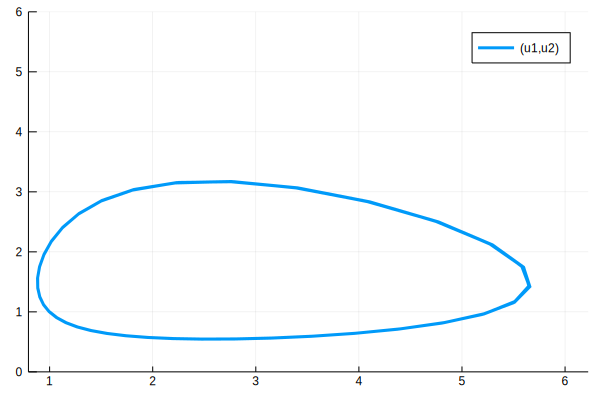

324.7430949445162 (tracked)

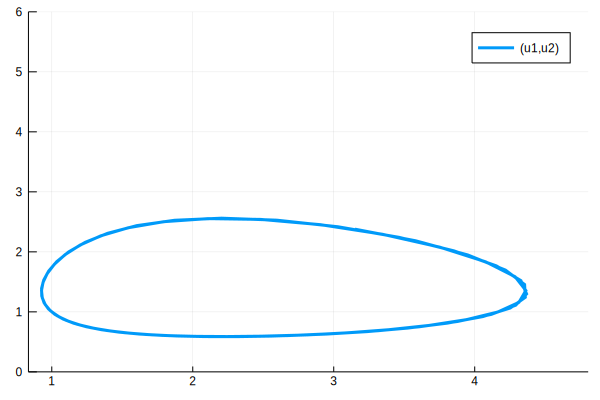

178.03653660440398 (tracked)

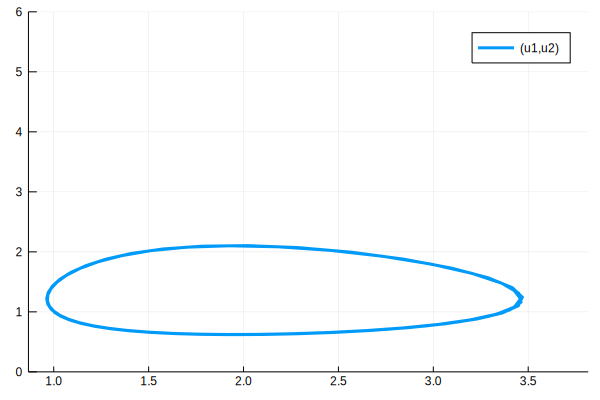

92.99631749571047 (tracked)

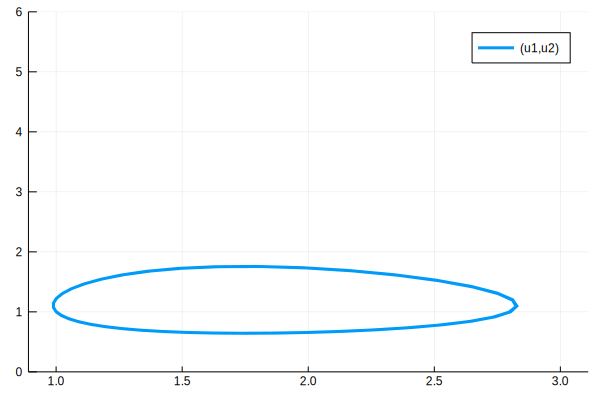

50.879279292919456 (tracked)

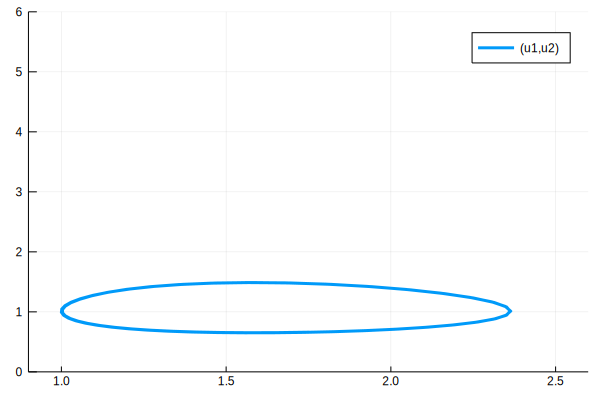

30.39247694514676 (tracked)

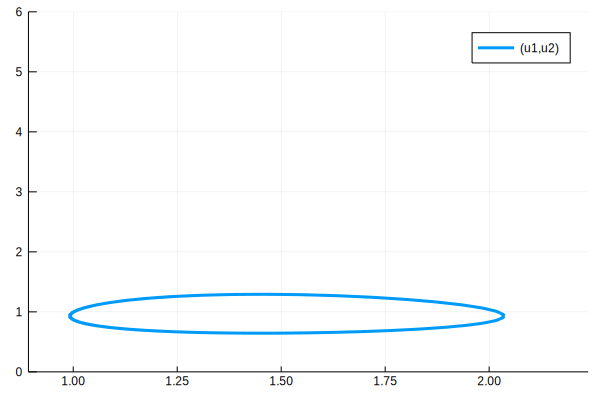

19.325850298657546 (tracked)

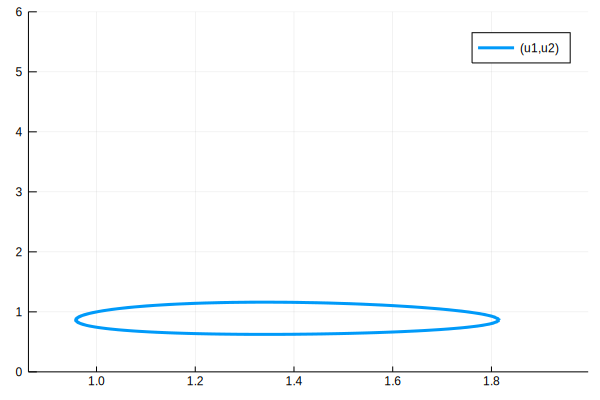

13.102457098513105 (tracked)

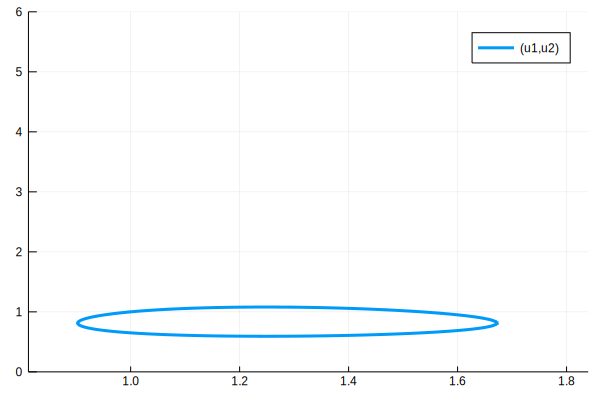

9.852327357191758 (tracked)

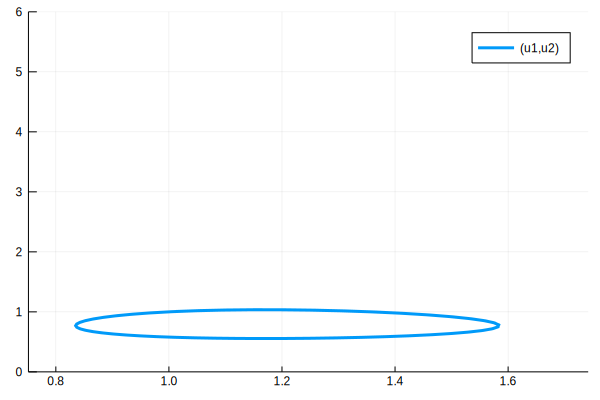

8.456366707219257 (tracked)

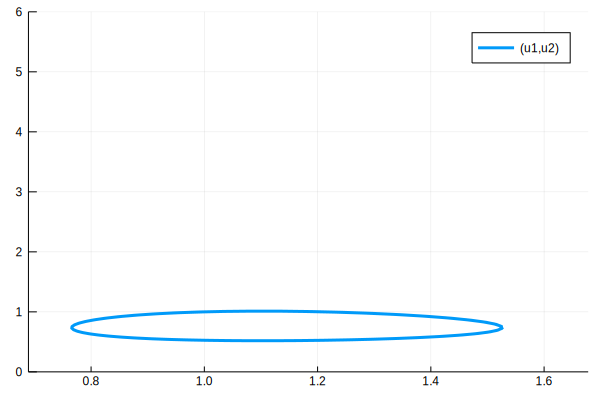

8.064402521358565 (tracked)

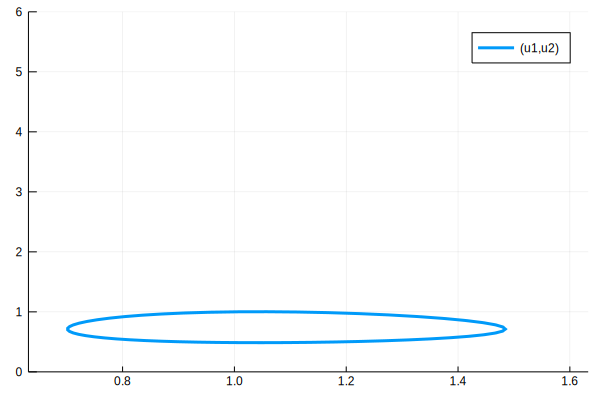

8.194469007098467 (tracked)

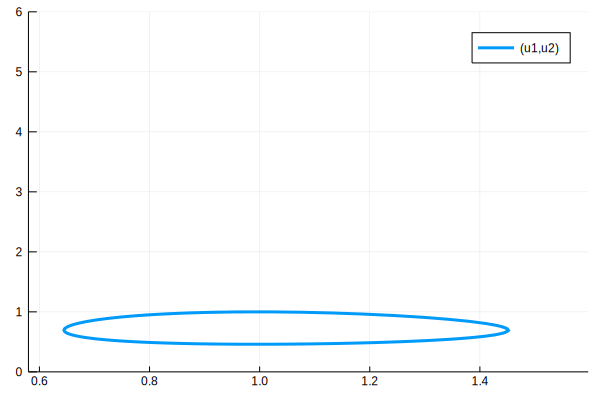

8.721155012162683 (tracked)

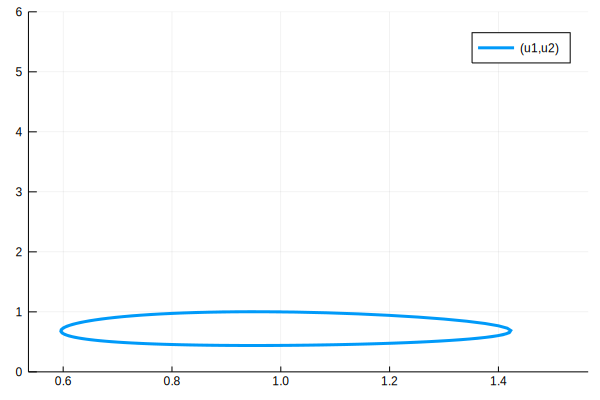

9.606237868320857 (tracked)

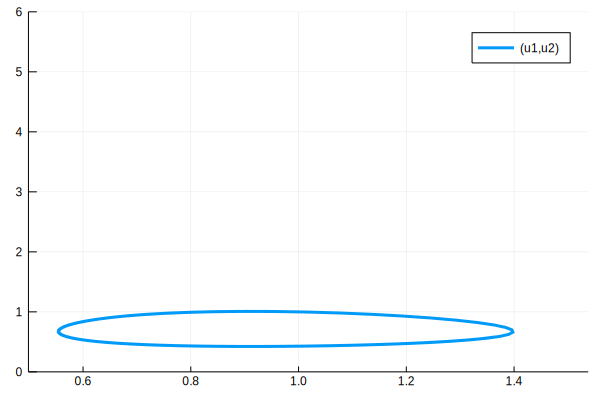

10.737184437594307 (tracked)

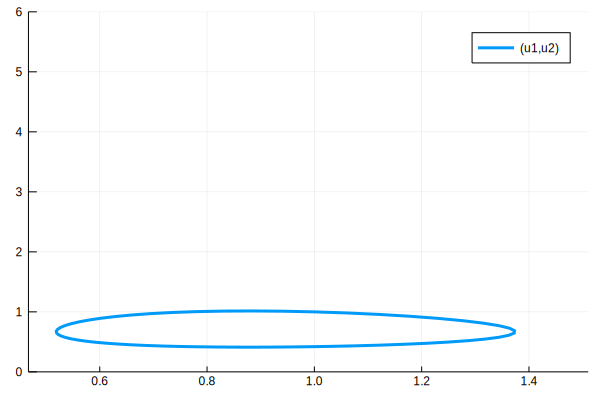

11.956755365058775 (tracked)

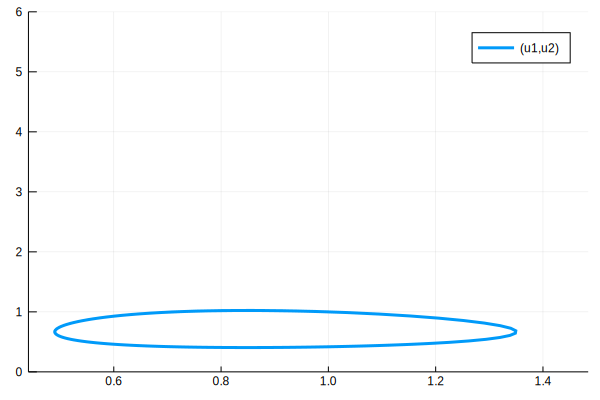

13.127075656202322 (tracked)

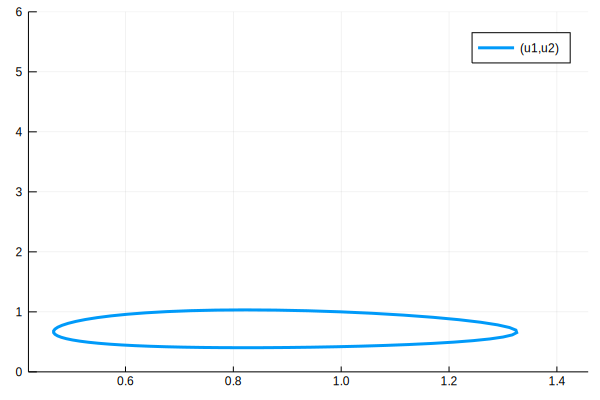

14.159214670957569 (tracked)

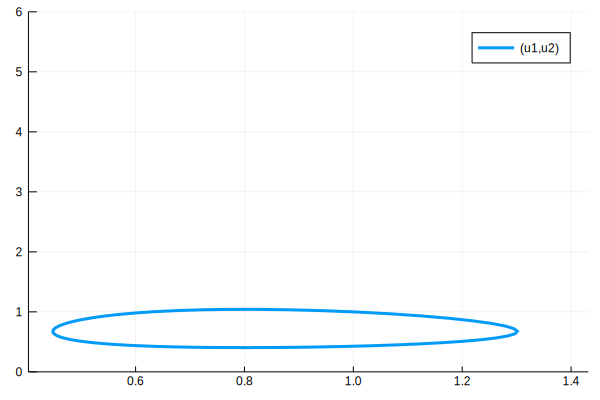

15.011382323694386 (tracked)

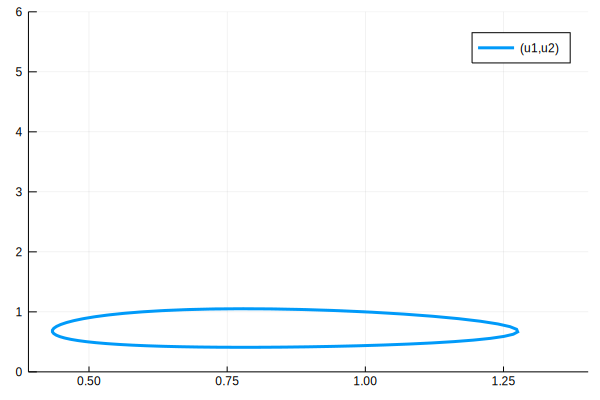

15.672582833436229 (tracked)

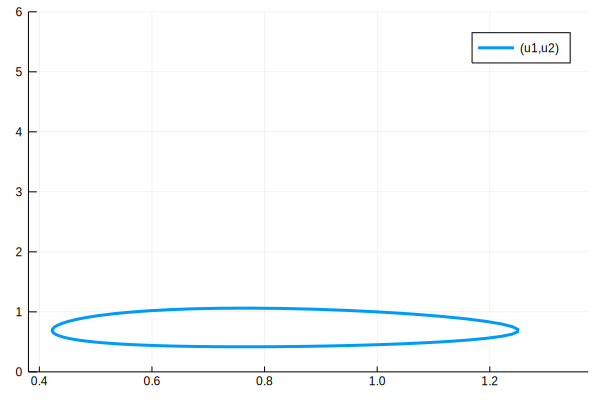

16.14988240677202 (tracked)

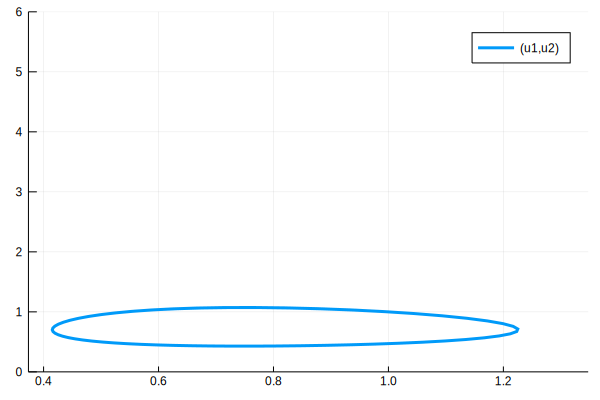

16.460025086529654 (tracked)

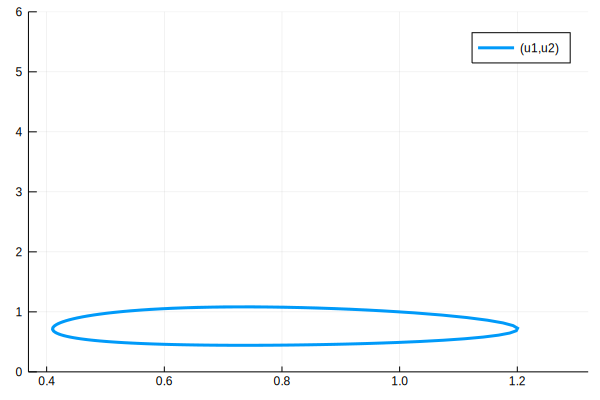

16.6237267195359 (tracked)

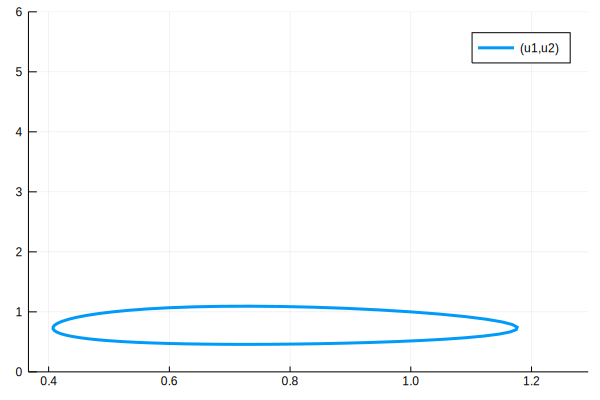

16.661991988820766 (tracked)

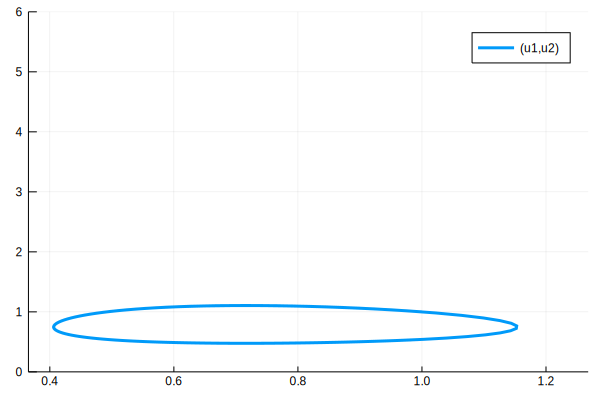

16.595770985624082 (tracked)

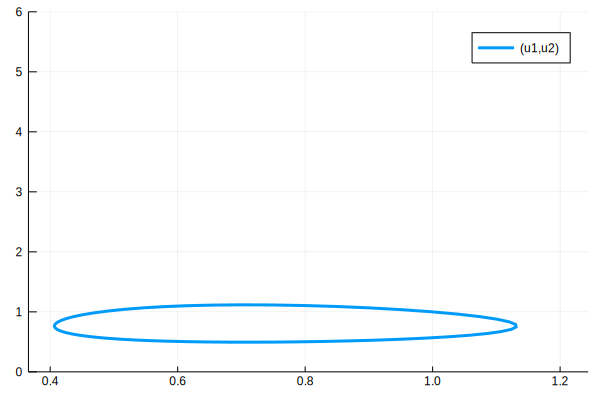

16.444516596887794 (tracked)

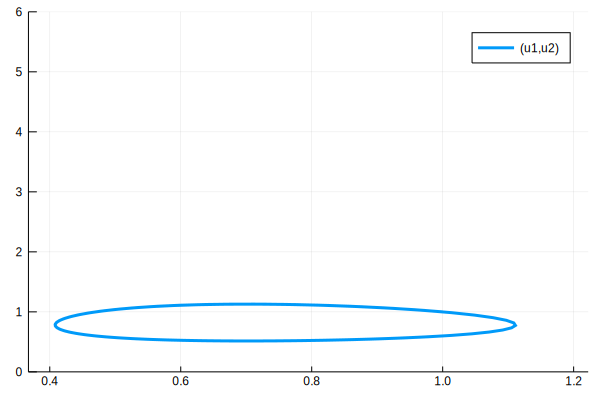

16.225989712238956 (tracked)

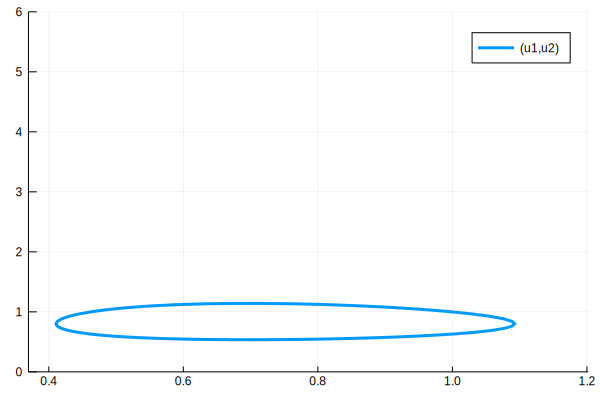

15.955598334387558 (tracked)

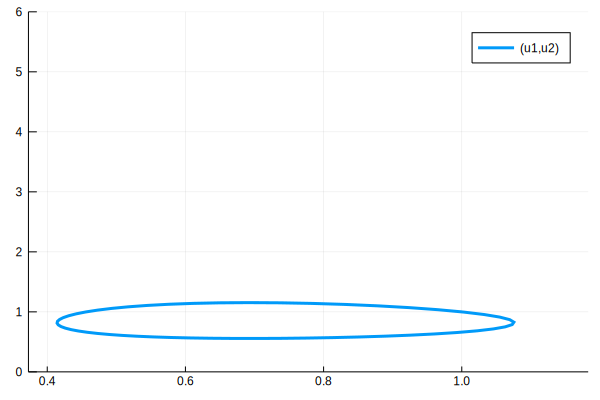

15.646326512717145 (tracked)

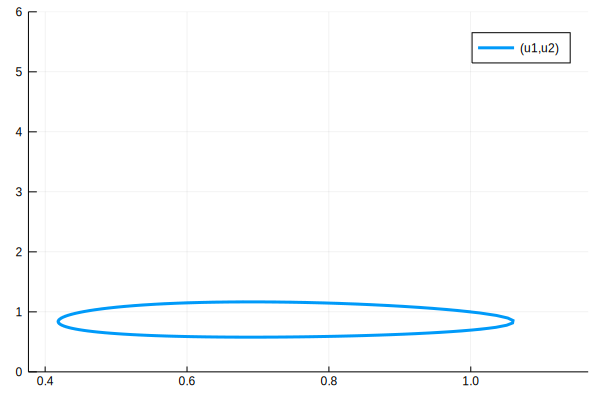

15.30886021456321 (tracked)

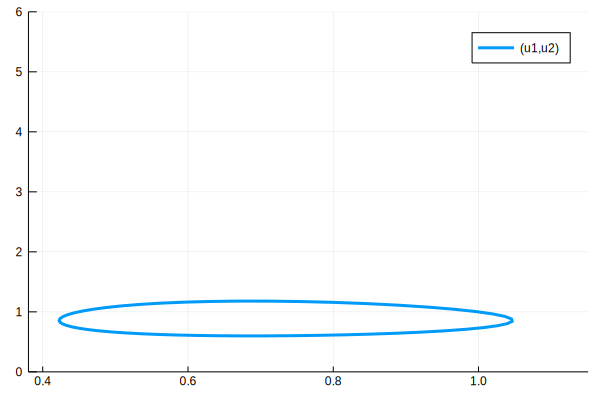

14.951747841595397 (tracked)

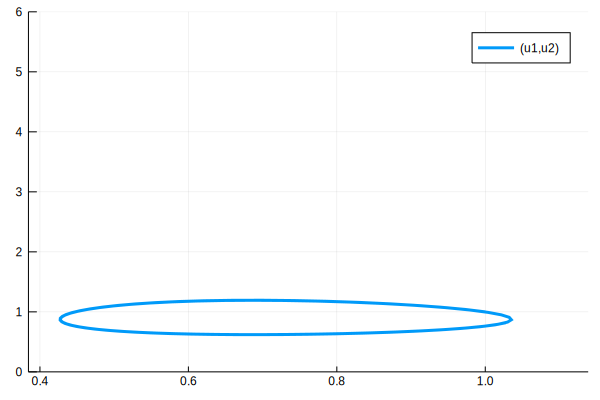

14.581716927798816 (tracked)

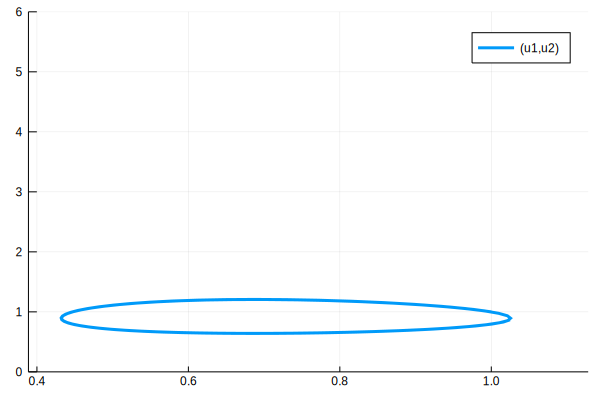

14.204090558699422 (tracked)

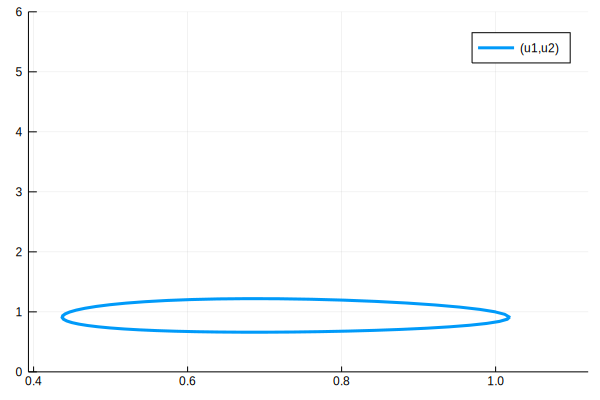

13.822935856554956 (tracked)

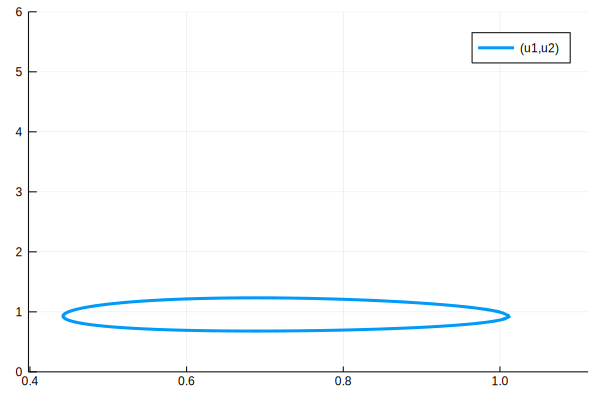

13.44125709865245 (tracked)

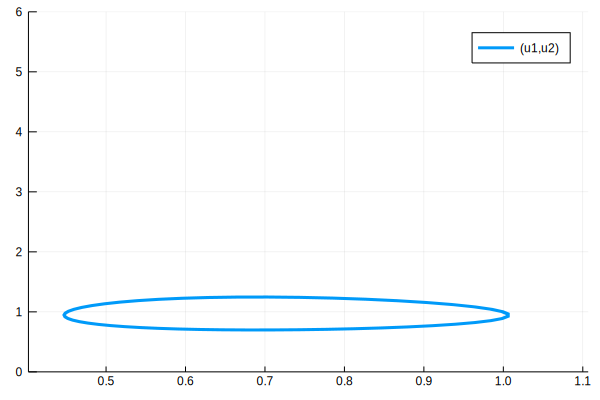

13.061209834233345 (tracked)

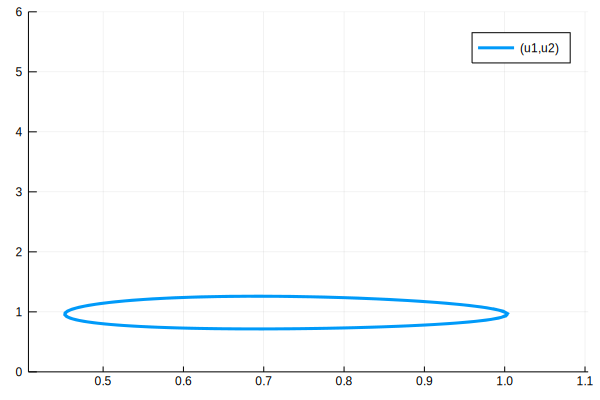

12.684422786713421 (tracked)

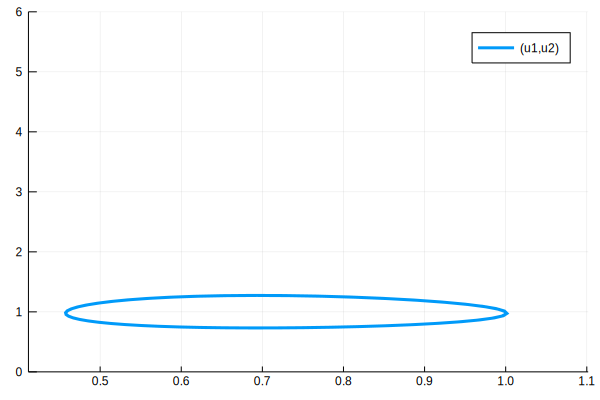

12.311989942210193 (tracked)

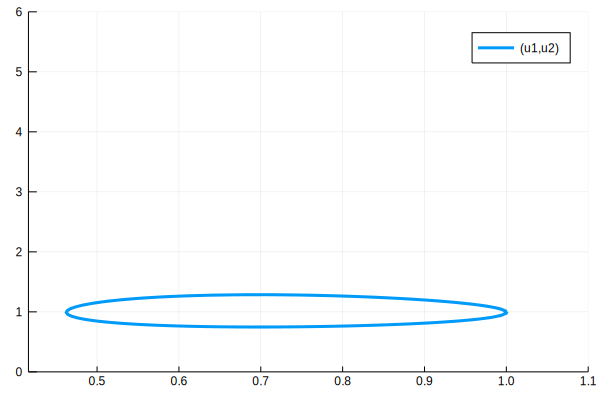

11.944596982153486 (tracked)

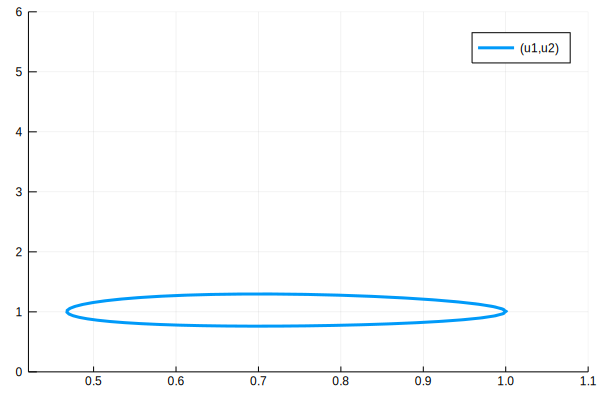

11.582613456108731 (tracked)

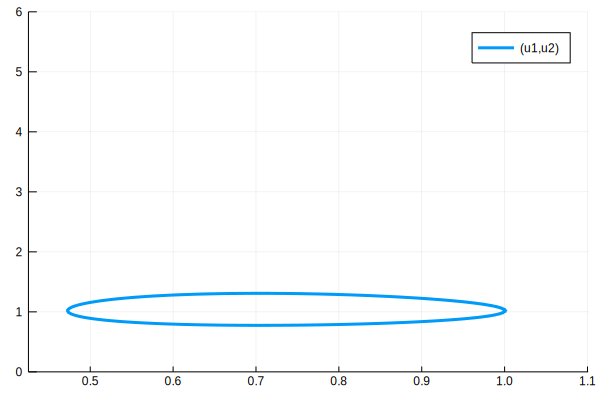

11.226314712118466 (tracked)

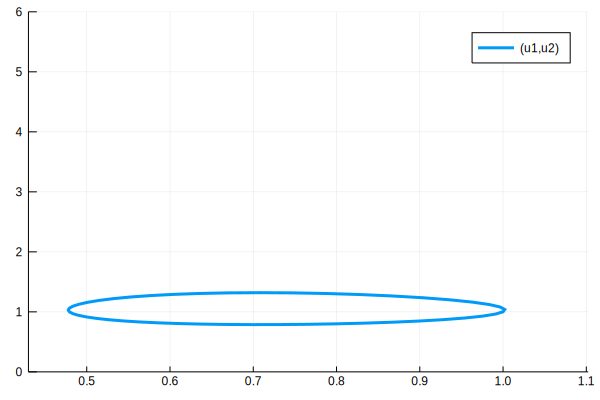

10.875815161714335 (tracked)

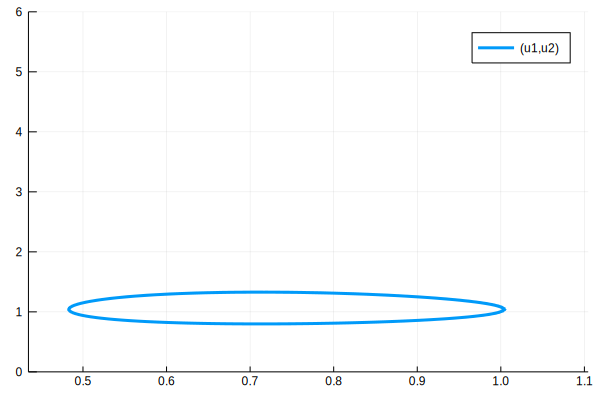

10.531025404031519 (tracked)

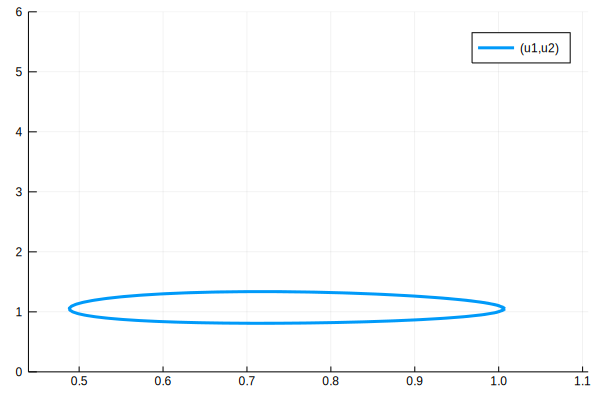

10.191769035311156 (tracked)

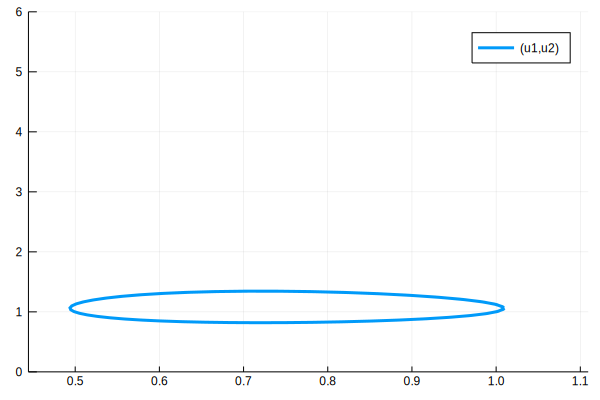

9.857786167640855 (tracked)

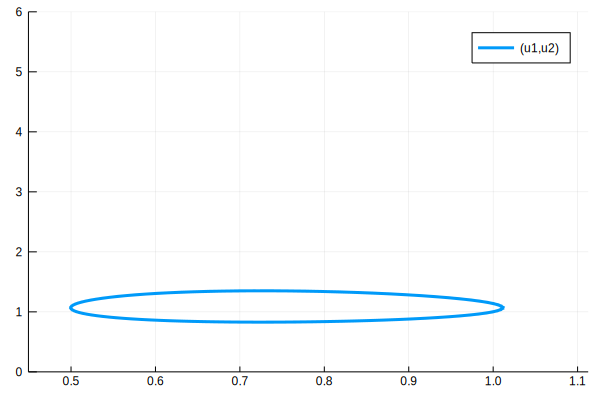

9.528751211205506 (tracked)

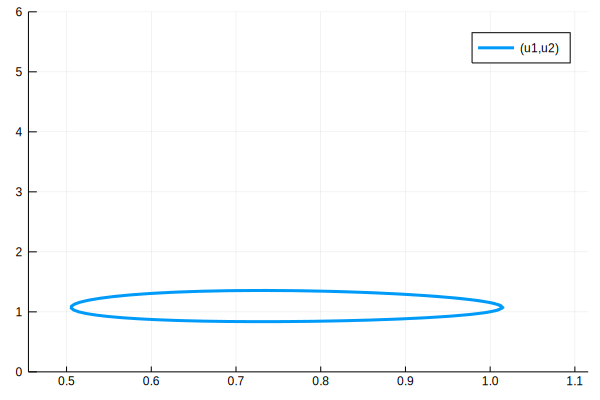

9.204325037219409 (tracked)

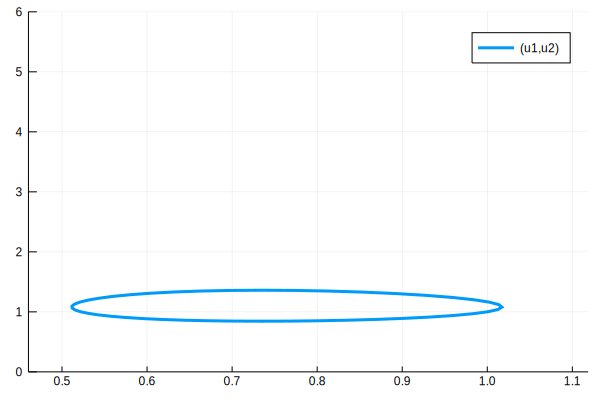

8.884091491206172 (tracked)

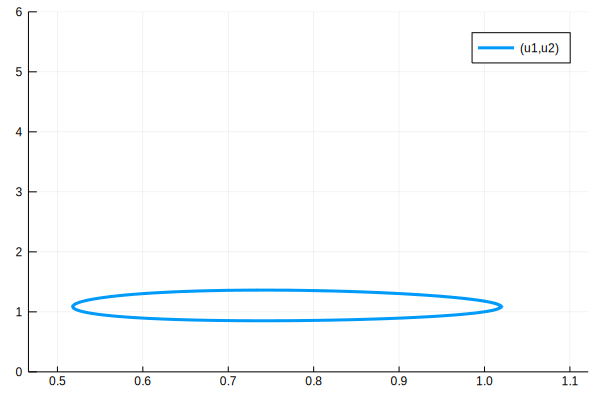

8.567666835434338 (tracked)

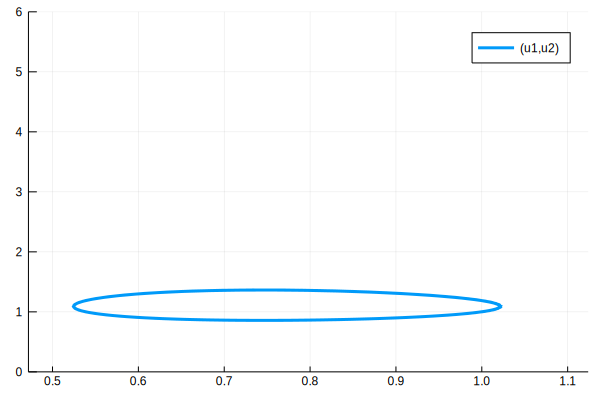

8.254700676069321 (tracked)

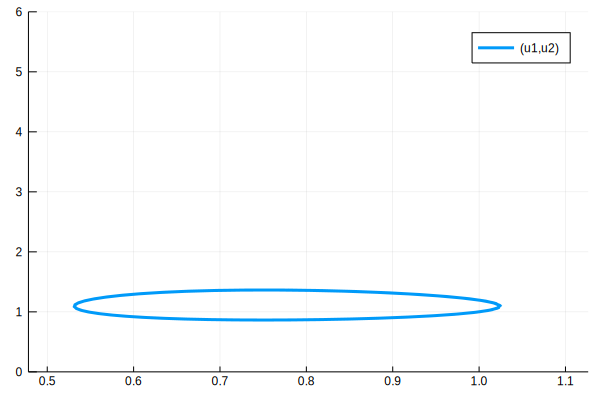

7.944905970549669 (tracked)

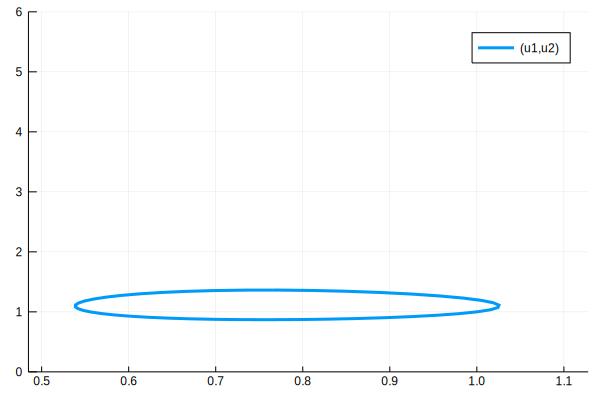

7.6380945176847534 (tracked)

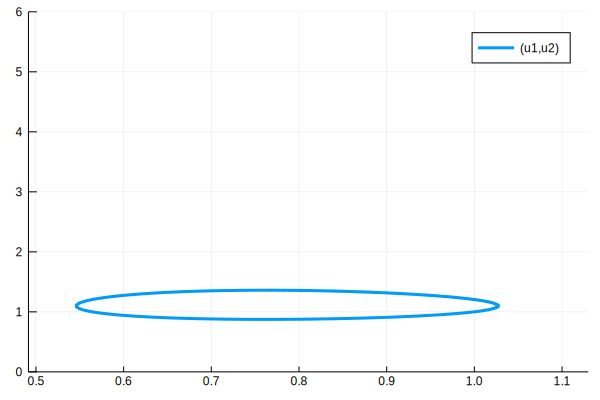

7.334162327396212 (tracked)

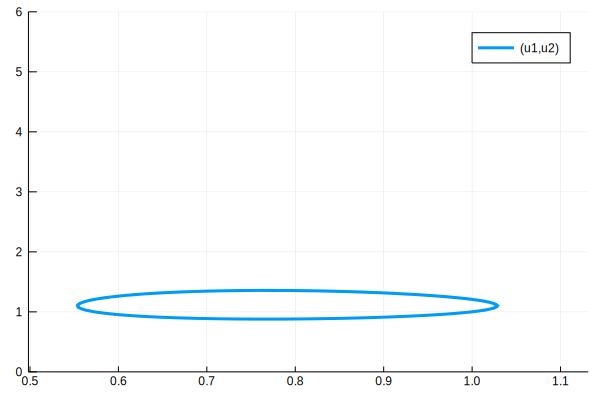

7.033118098681452 (tracked)

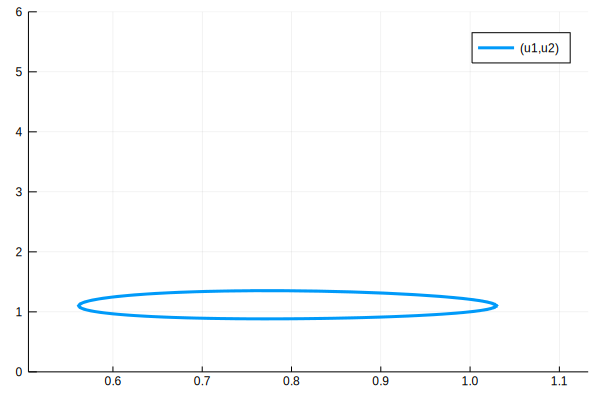

6.735088045576932 (tracked)

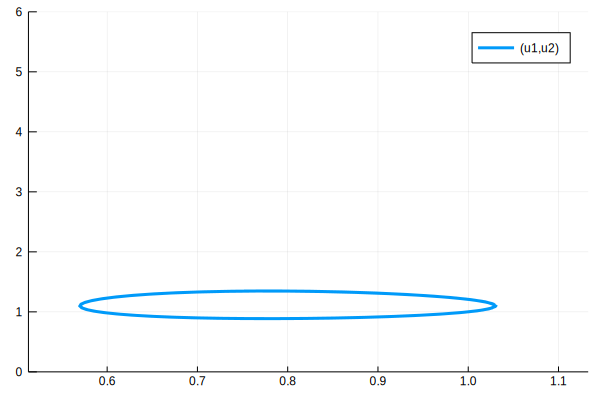

6.44030249063799 (tracked)

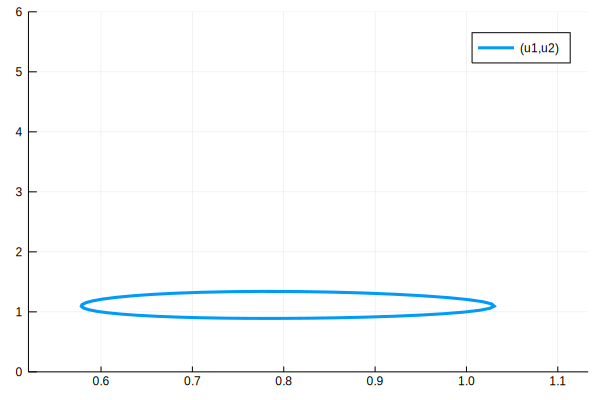

6.149104121926703 (tracked)

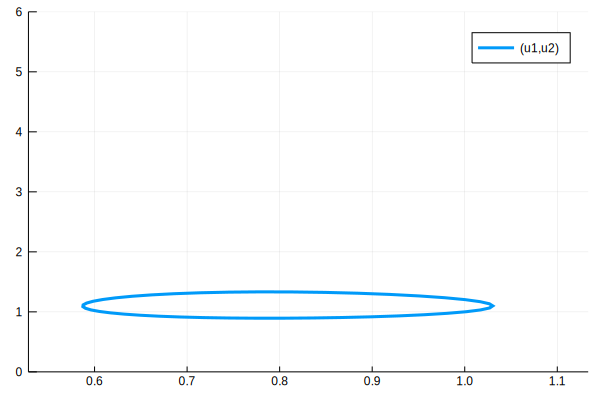

5.8619204614434315 (tracked)

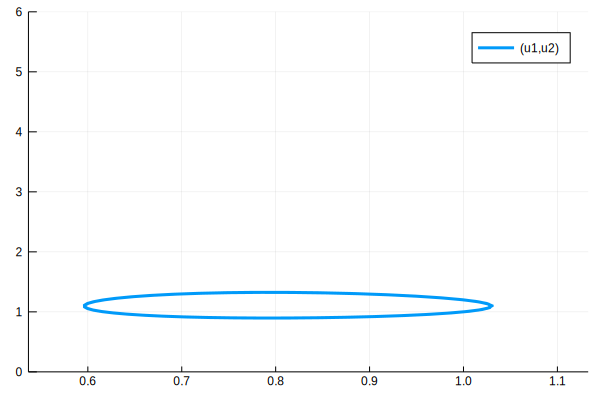

5.579275032678872 (tracked)

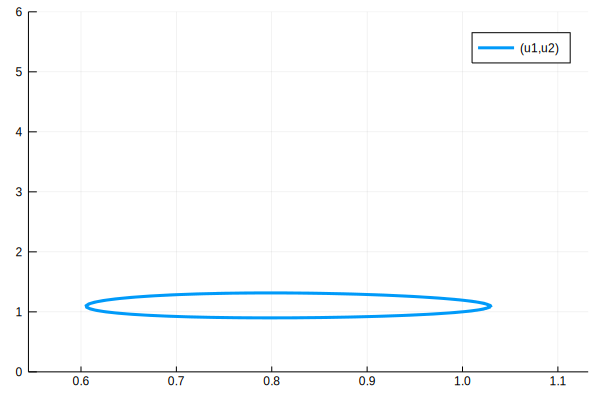

5.301744395179247 (tracked)

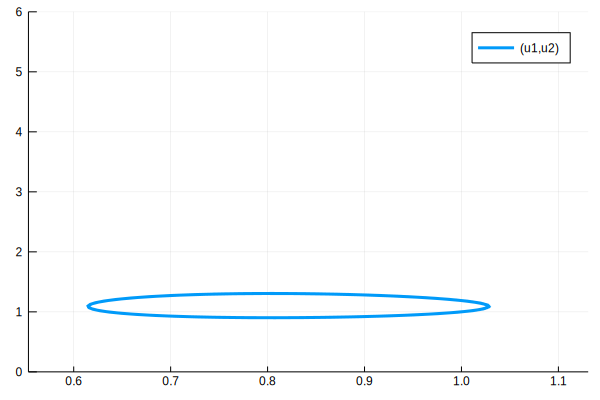

5.029921351004804 (tracked)

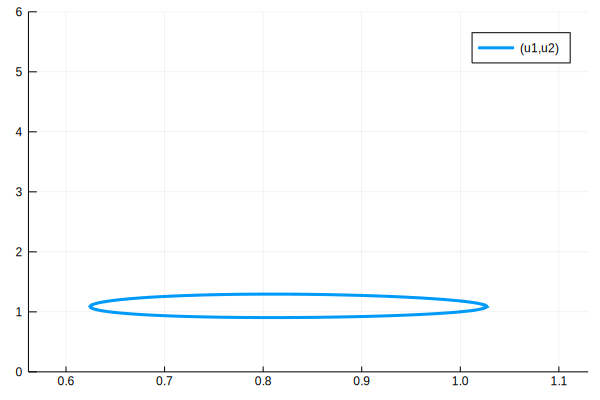

4.764412155718374 (tracked)

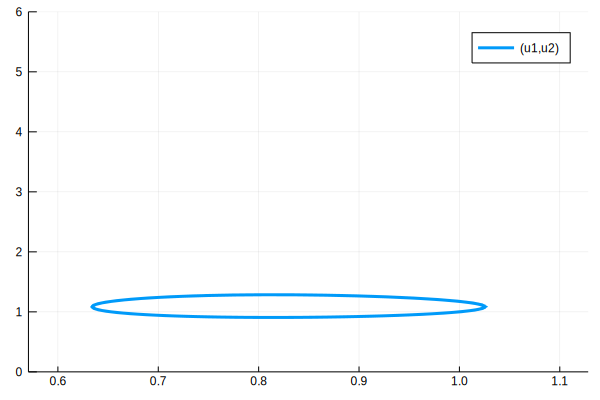

4.505827875387228 (tracked)

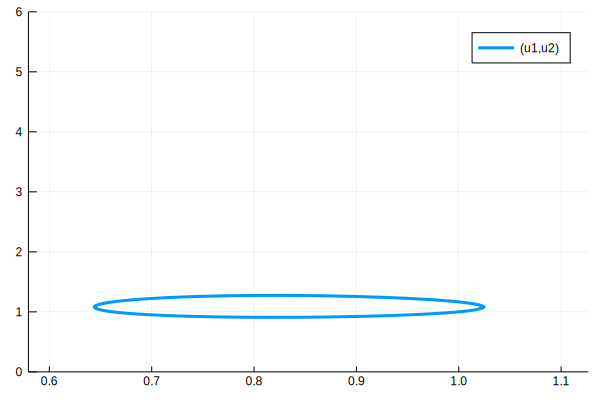

4.254719860282872 (tracked)

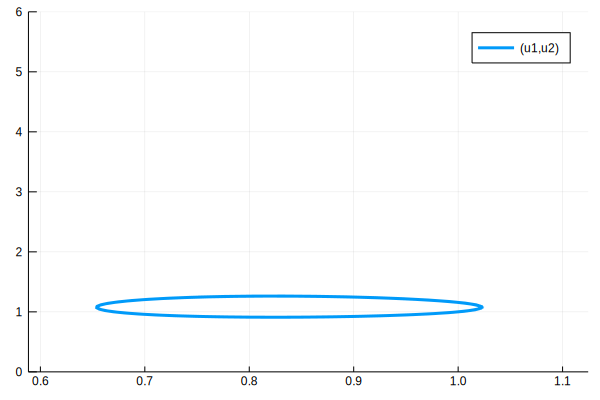

4.011599648991357 (tracked)

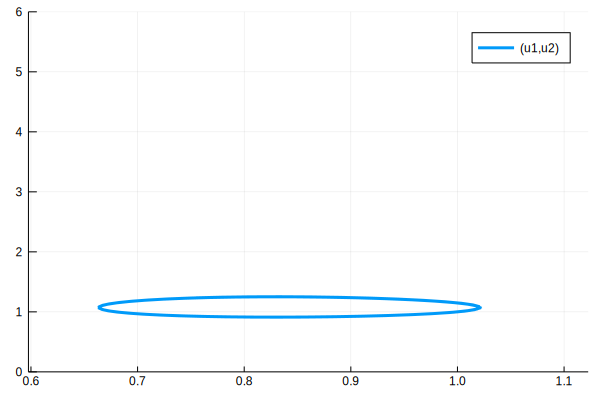

3.7769194278763076 (tracked)

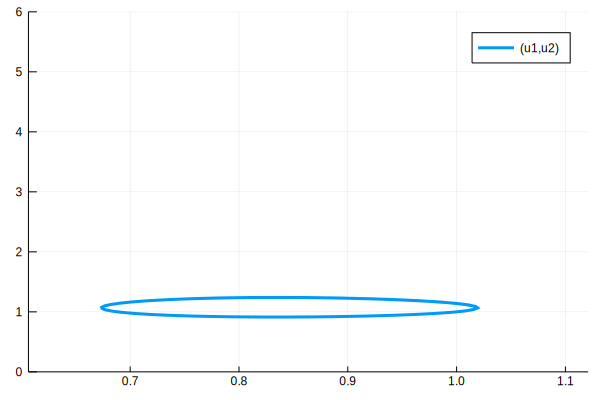

3.551028836887518 (tracked)

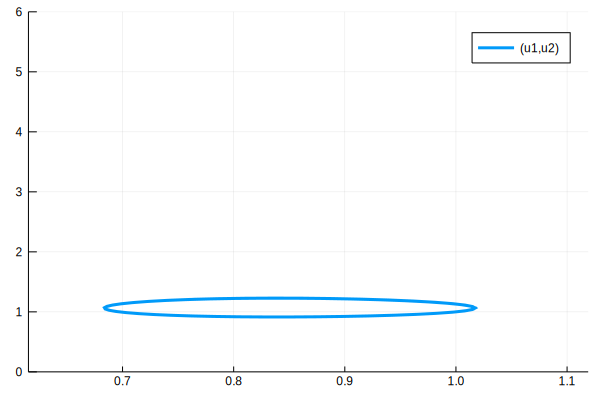

3.334250525920334 (tracked)

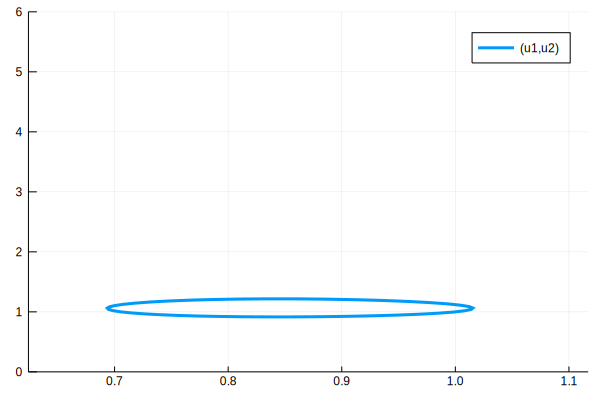

3.1268081029799 (tracked)

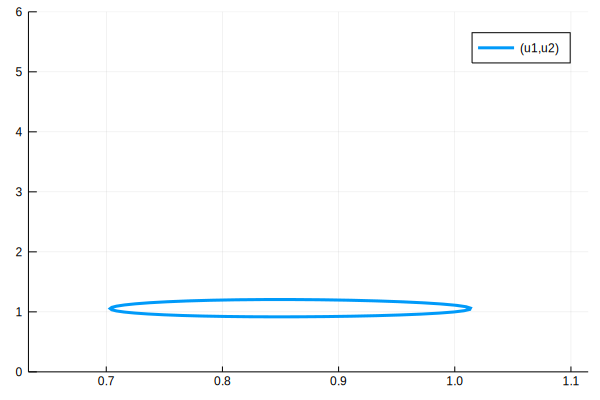

2.928799380480009 (tracked)

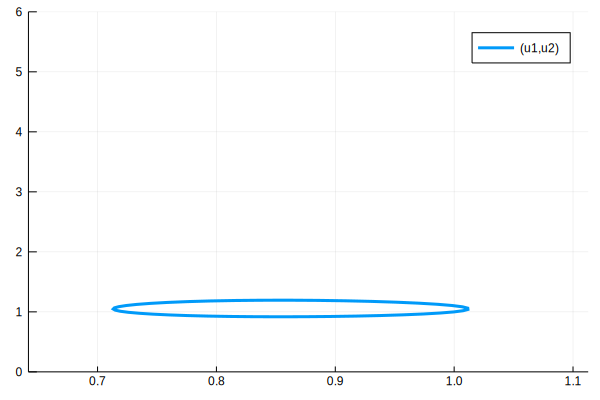

2.7402672410708107 (tracked)

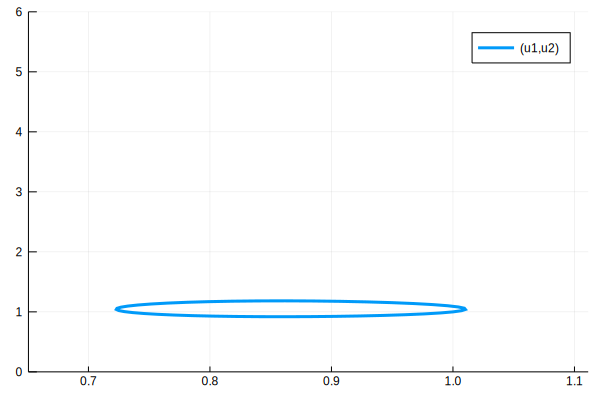

2.5611654416893495 (tracked)

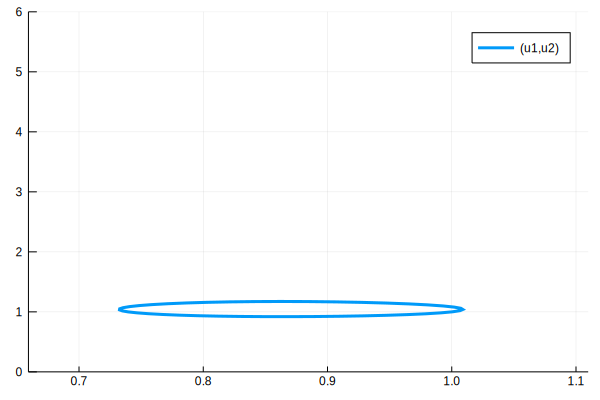

2.3913627617695674 (tracked)

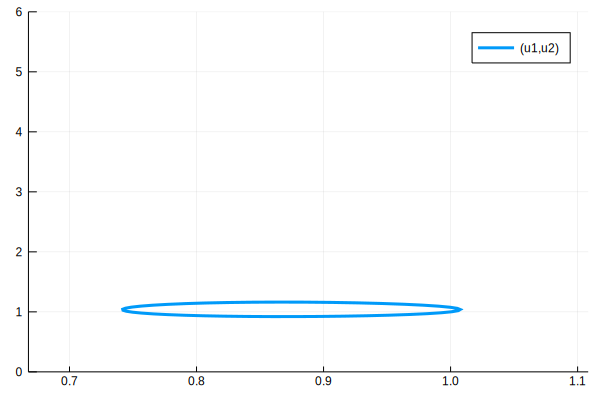

2.230662603429323 (tracked)

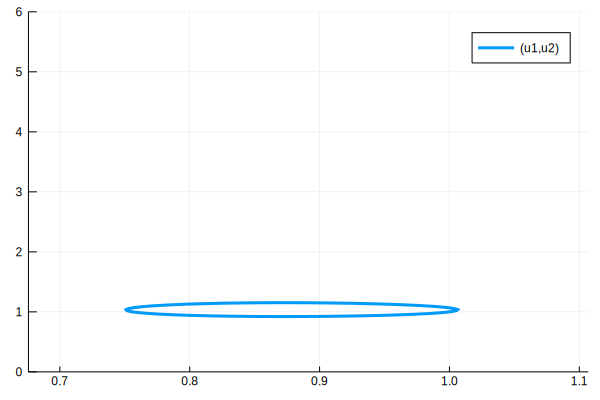

2.078784075749153 (tracked)

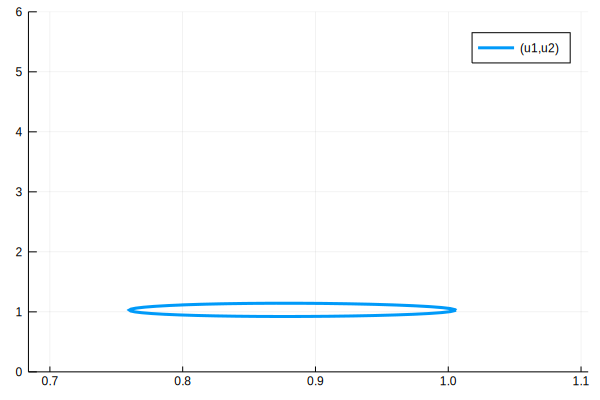

1.9354582343639606 (tracked)

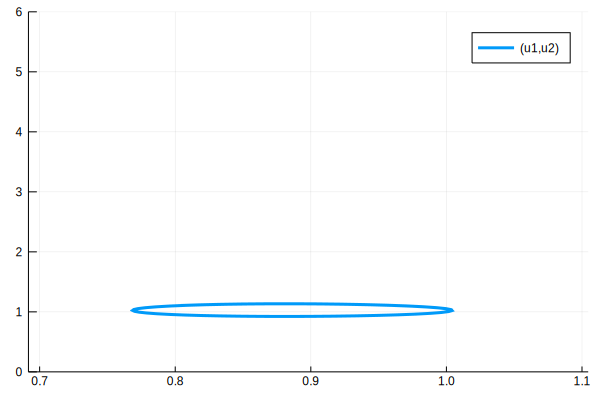

1.8003410045075376 (tracked)

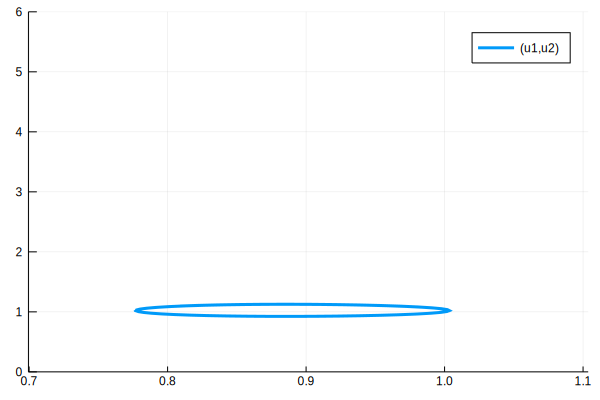

1.6730419056338022 (tracked)

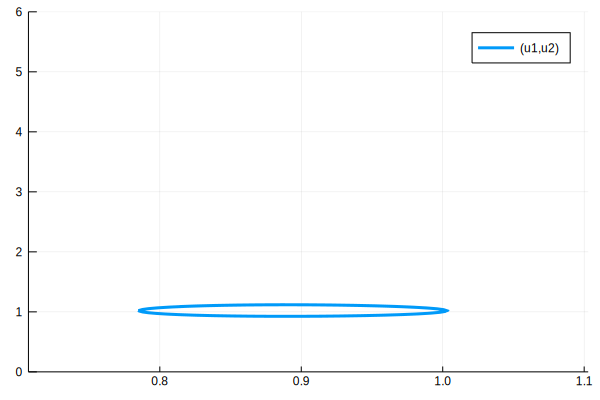

1.5531613470029486 (tracked)

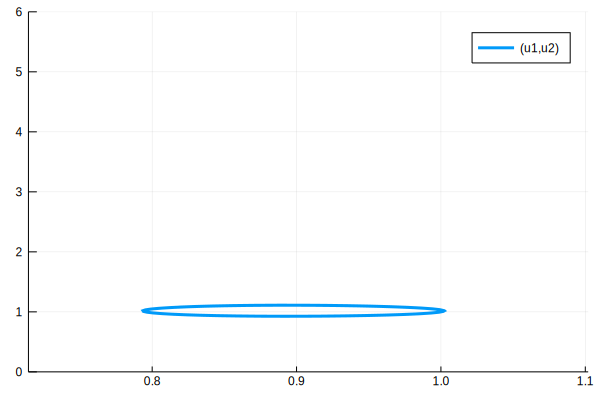

1.4403254107551344 (tracked)

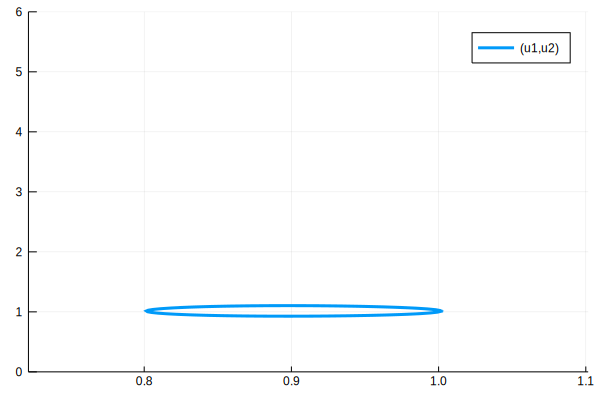

1.334141610677914 (tracked)

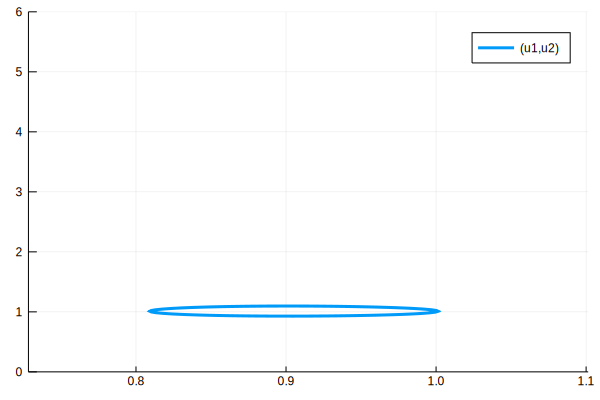

1.2342181714987661 (tracked)

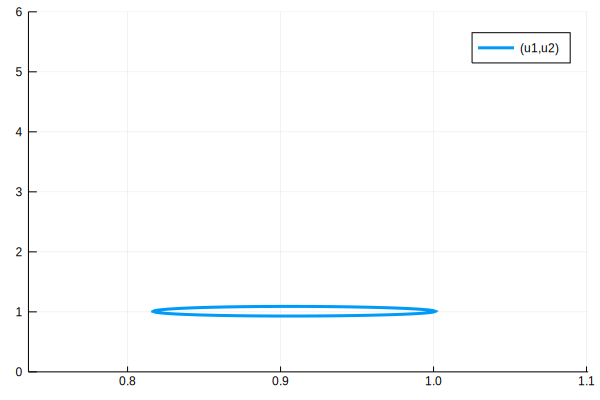

1.140206033198134 (tracked)

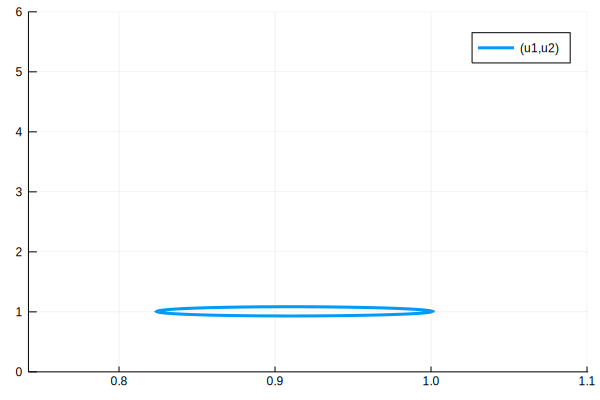

1.0517736896764571 (tracked)

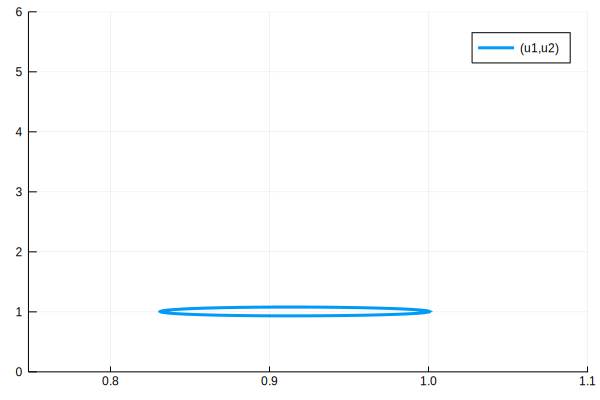

0.9685980379053126 (tracked)

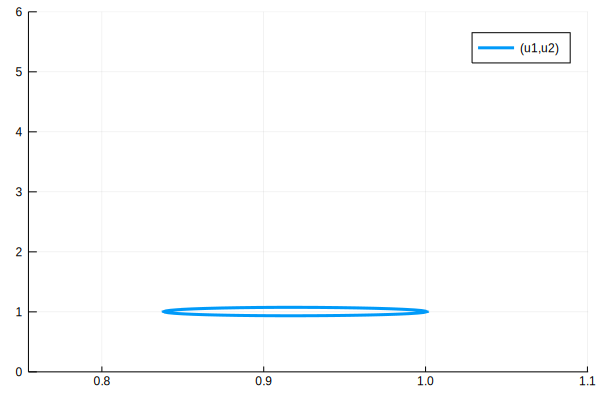

0.8903908980676111 (tracked)

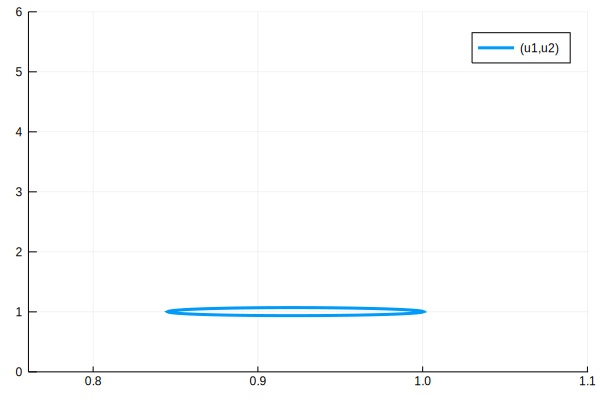

0.8168895723293773 (tracked)

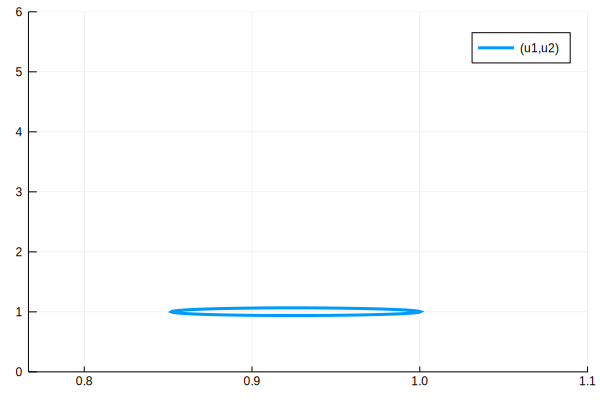

0.7478615391852367 (tracked)

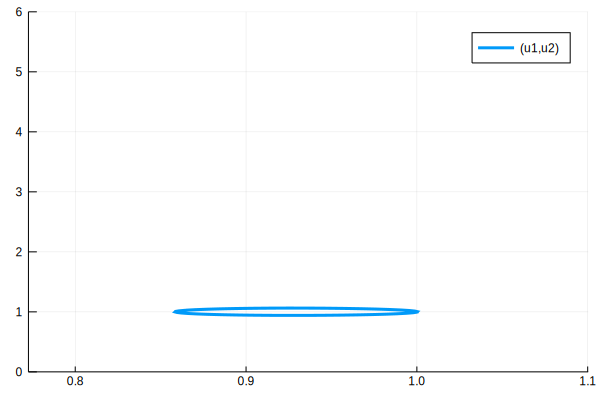

0.6831131256981061 (tracked)

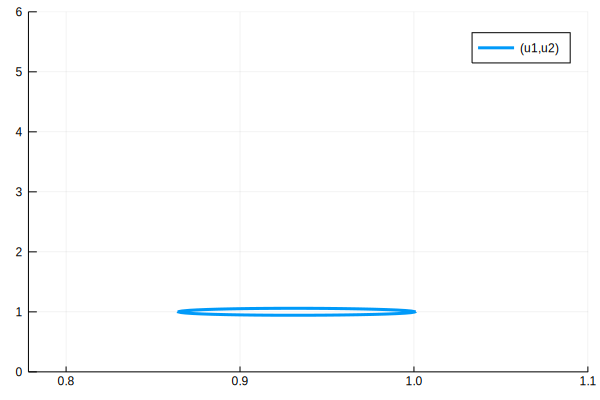

0.6224641057299056 (tracked)

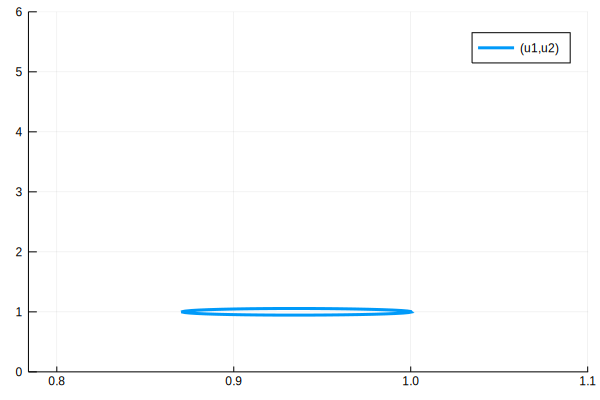

0.5657513681512907 (tracked)

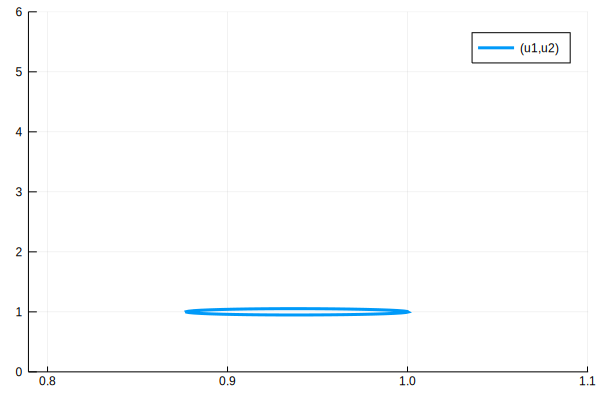

0.5128337166078684 (tracked)

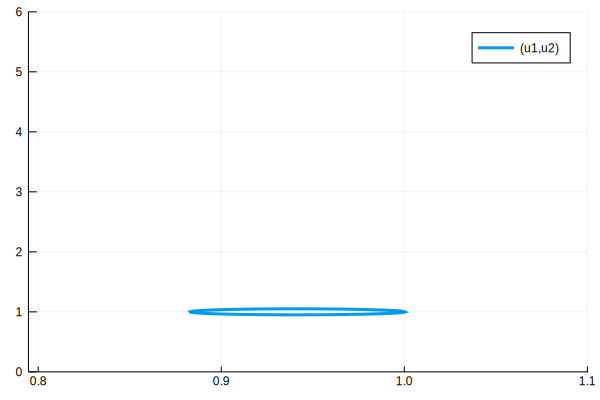

0.46357362381699313 (tracked)

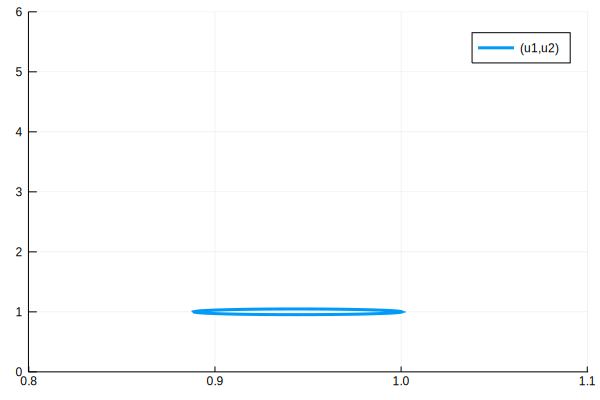

0.41784244589670994 (tracked)

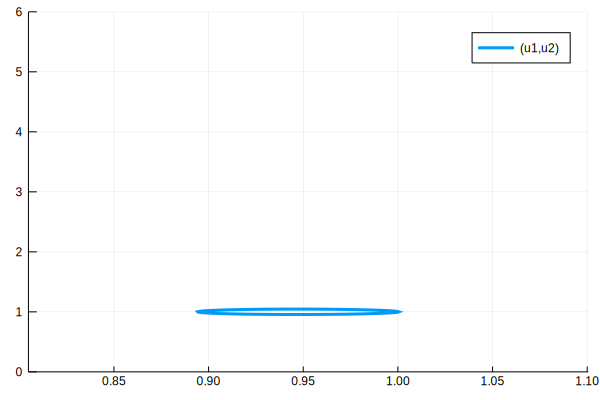

0.3755143712026791 (tracked)

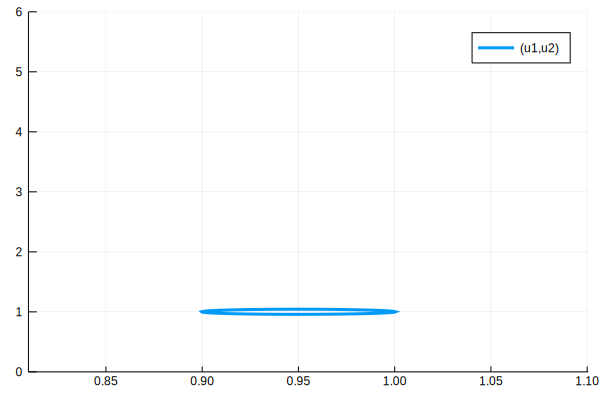

0.33646155574520814 (tracked)

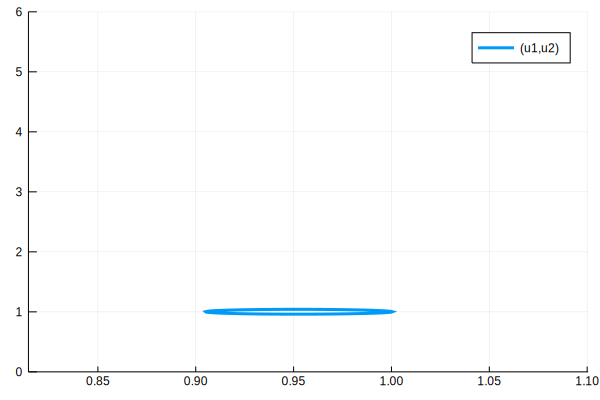

0.3005562965761299 (tracked)

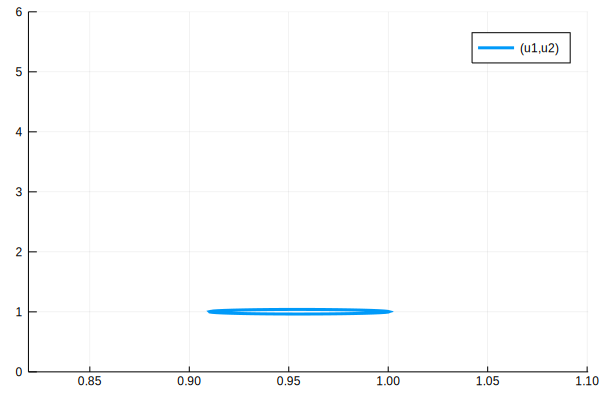

0.267663291378518 (tracked)

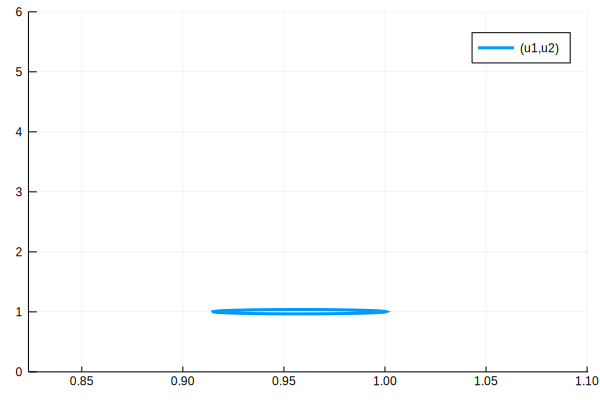

In [15]:
Flux.train!(loss_rd, params, data, opt, cb = cb)
# plot(collect(-sin(i/10)/2+1 for i in 1:101),ylim=(0,6))